%load_ext autoreload
%autoreload 2

# Tokenizing smiles

In [16]:
import pandas as pd
import torch
from Preprocess.utils import SMILESTokenizerBuilder, RawDataLoader



In [17]:
file_name = "qm9.csv"

# Initialize the data loader with qm9.csv
loader = RawDataLoader(file_name, smiles_column="smiles")

# Create a tokenizer with initial vocabulary of basic elements
initial_vocab = ["C", "N", "O"]
tokenizer = SMILESTokenizerBuilder(vocab_list=initial_vocab)

# Get unique tokens from all SMILES
unique_tokens = tokenizer.tokenize_with_vocab(loader.data, "smiles")
tokenizer.build_vocab_mappings()


Resulting vocabulary after processing all SMILES:
['<SOS>', 'C', 'F', 'H', 'N', 'O', '#', '(', ')', '+', '-', '=', '[', ']', '1', '2', '3', '4', '5', '<EOS>', '<PAD>']

Token's id
{'<PAD>': 0, '<SOS>': 1, '<EOS>': 60, 'C': 10, 'F': 11, 'H': 12, 'N': 13, 'O': 14, '#': 30, '(': 31, ')': 32, '+': 33, '-': 34, '=': 35, '[': 36, ']': 37, '1': 40, '2': 41, '3': 42, '4': 43, '5': 44}

Token statistics
Number of unique tokens found: 21
Tokens Frequency : Counter({'C': 846556, '1': 270020, 'O': 187997, 'N': 139764, '(': 126532, ')': 126532, '2': 121675, '=': 106335, '#': 37027, '3': 34756, '[': 9918, ']': 9918, 'H': 8247, '4': 5186, 'F': 3314, '-': 1808, '+': 1705, '5': 242})


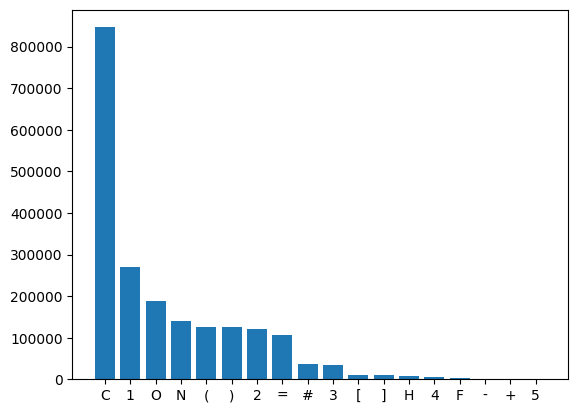

In [18]:
# Print the resulting vocabulary

print("Resulting vocabulary after processing all SMILES:")
print(unique_tokens)

print("\nToken's id")
print(tokenizer.vocab_to_idx)

# Print statistics
print("\nToken statistics")
print(f"Number of unique tokens found: {len(unique_tokens)}")
print(f"Tokens Frequency : {tokenizer.token_counts}")

import matplotlib.pyplot as plt

stats = tokenizer.token_counts
sorted_items = sorted(stats.items(), key=lambda x: x[1], reverse=True)
tokens, counts = zip(*sorted_items)

plt.bar(tokens, counts)
plt.show()

In [62]:
seq_len = 40
smiles_tensor = tokenizer.encode_to_tensor(loader.data, seq_len)
print(f"Tensor shape: {smiles_tensor.shape}")

# Calculate number of zeros (padding) in each sequence
padding_counts = (smiles_tensor == 0).sum(dim=1)

# Find the index of the sequence with minimum padding
min_padding_idx = padding_counts.argmin().item()

# Get the sequence with least padding
least_padded_seq = smiles_tensor[min_padding_idx]

print(f"\nSequence with least padding (index {min_padding_idx}):")
print(f"Sequence: {least_padded_seq.tolist()}")
print(f"Number of padding tokens: {padding_counts[min_padding_idx].item()}")
print(f"Original SMILES: {loader.data.iloc[min_padding_idx]['smiles']}")

# Optional: Show top 5 sequences with least padding
print("\nTop 3 sequences with least padding:")
top_3_indices = padding_counts.argsort()[:3]
for idx in top_5_indices:
    idx_int = idx.item()  # Convert tensor to integer
    seq = smiles_tensor[idx_int]
    print(f"\nIndex {idx_int}:")
    print(f"Sequence: {seq.tolist()}")
    print(f"Padding tokens: {padding_counts[idx_int].item()}")
    print(f"Original SMILES: {loader.data.iloc[idx_int]['smiles']}")

Tensor shape: torch.Size([133885, 40])

Sequence with least padding (index 24869):
Sequence: [1, 10, 40, 31, 35, 14, 32, 36, 13, 12, 37, 10, 31, 35, 14, 32, 36, 13, 12, 37, 10, 31, 35, 14, 32, 36, 13, 12, 37, 40, 60, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Number of padding tokens: 9
Original SMILES: c1(=O)[nH]c(=O)[nH]c(=O)[nH]1

Top 3 sequences with least padding:

Index 24869:
Sequence: [1, 10, 40, 31, 35, 14, 32, 36, 13, 12, 37, 10, 31, 35, 14, 32, 36, 13, 12, 37, 10, 31, 35, 14, 32, 36, 13, 12, 37, 40, 60, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Padding tokens: 9
Original SMILES: c1(=O)[nH]c(=O)[nH]c(=O)[nH]1

Index 54383:
Sequence: [1, 10, 10, 40, 41, 10, 10, 31, 10, 40, 32, 31, 36, 13, 12, 41, 33, 37, 41, 32, 10, 31, 36, 14, 34, 37, 32, 35, 14, 60, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Padding tokens: 10
Original SMILES: CC12CC(C1)([NH2+]2)C([O-])=O

Index 54386:
Sequence: [1, 36, 13, 12, 42, 33, 37, 10, 40, 41, 10, 10, 31, 10, 40, 32, 31, 10, 41, 32, 10, 31, 36, 14, 34, 37, 32, 35, 14, 60, 0, 0, 0, 0, 0, 0, 0, 

# Getting Target's 

In [63]:
Y = torch.tensor(loader.data['u298'].values, dtype=torch.float32)
print(Y.shape)
print(Y[12])

torch.Size([133885])
tensor(-119.0479)


In [64]:
# Basic statistics
print("Y tensor statistics:")
print(f"Shape: {Y.shape}")
print(f"Min value: {Y.min().item():.4f}")
print(f"Max value: {Y.max().item():.4f}")
print(f"Mean value: {Y.float().mean().item():.4f}")
print(f"Median value: {Y.float().median().item():.4f}")
print(f"Standard deviation: {Y.float().std().item():.4f}")

# Optional: Show distribution in bins
print("\nValue distribution:")
hist = torch.histc(Y.float(), bins=10)
bin_edges = torch.linspace(Y.min(), Y.max(), 11)
for i in range(10):
    print(f"Range {bin_edges[i]:.2f} to {bin_edges[i+1]:.2f}: {hist[i].item():.0f} values")

# Optional: Show some sample values
print("\nSample values (first 5):")
print(Y[:5].tolist())

Y tensor statistics:
Shape: torch.Size([133885])
Min value: -714.5602
Max value: -40.4761
Mean value: -411.5355
Median value: -417.8574
Standard deviation: 40.0600

Value distribution:
Range -714.56 to -647.15: 2 values
Range -647.15 to -579.74: 115 values
Range -579.74 to -512.33: 628 values
Range -512.33 to -444.93: 22465 values
Range -444.93 to -377.52: 90693 values
Range -377.52 to -310.11: 18313 values
Range -310.11 to -242.70: 1492 values
Range -242.70 to -175.29: 150 values
Range -175.29 to -107.88: 21 values
Range -107.88 to -40.48: 6 values

Sample values (first 5):
[-40.4760627746582, -56.52302551269531, -76.40187072753906, -77.30552673339844, -93.40937042236328]


# Creating Model
Model is consists of a Transformer_encoder part to reach latent space and then an MLP to do the Task

In [112]:
from Model.transformer_encoder import TransformerEncoder
from Model.mlp import MLP
from Model.combined_model import CombinedModel
import torch.nn as nn

In [113]:
# Initialize the models
transformer = TransformerEncoder(
    vocab_size=tokenizer.get_vocab_size(),
    d_model=128,
    nhead=4,
    num_encoder_layers=2,
    dim_feedforward=512,
    dropout=0.1,
    max_seq_length=seq_len,
    padding_token=0
)

mlp = MLP(
    input_dim=128,
    output_dim=1,
    dims=[256,128,64,32,8,1],
    activations=['leaky_relu', 'leaky_relu', 'tanh','tanh', 'tanh','']
)

model = CombinedModel(transformer , mlp)

In [114]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Count total parameters
total_params = count_parameters(model)
print(f"Total trainable parameters: {total_params:,}")

# Optional: Print parameters by layer
print("\nParameters by layer:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.numel():,} parameters")

Total trainable parameters: 480,883

Parameters by layer:
transformer.token_embedding.weight: 7,808 parameters
transformer.transformer_encoder.layers.0.self_attn.in_proj_weight: 49,152 parameters
transformer.transformer_encoder.layers.0.self_attn.in_proj_bias: 384 parameters
transformer.transformer_encoder.layers.0.self_attn.out_proj.weight: 16,384 parameters
transformer.transformer_encoder.layers.0.self_attn.out_proj.bias: 128 parameters
transformer.transformer_encoder.layers.0.linear1.weight: 65,536 parameters
transformer.transformer_encoder.layers.0.linear1.bias: 512 parameters
transformer.transformer_encoder.layers.0.linear2.weight: 65,536 parameters
transformer.transformer_encoder.layers.0.linear2.bias: 128 parameters
transformer.transformer_encoder.layers.0.norm1.weight: 128 parameters
transformer.transformer_encoder.layers.0.norm1.bias: 128 parameters
transformer.transformer_encoder.layers.0.norm2.weight: 128 parameters
transformer.transformer_encoder.layers.0.norm2.bias: 128 pa

In [115]:
import torch
from torch.utils.data import DataLoader, random_split
from Model.utils import create_data_loaders
import numpy as np

In [116]:
X = smiles_tensor

In [ ]:
# Create data loaders
torch.manual_seed(42)
np.random.seed(42)
train_loader, val_loader, test_loader = create_data_loaders(
    X=X,
    Y=Y,
    p=0.5,  # Use p% of data
    split_ratios=[0.1, 0.18, 0.72],  # [test, val, train] ratios
    batch_size=160
)

In [ ]:
import torch.optim as optim
from Model.trainer import Trainer

# Define loss function
criterion = nn.MSELoss()  # For energy task

# Define optimizer
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=0.001,
    betas=(0.9, 0.999),
    eps=1e-8,
    weight_decay=0.01
)

# Define learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=5,
)

In [ ]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model.to(device)

# Initialize trainer
trainer = Trainer(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    device=device
)

In [ ]:
# Train the model
trainer.train(
    train_loader=train_loader,
    num_epochs=10,
    scheduler=scheduler
)

Epoch: 1/10 Batch: 0/302 Loss: 166087.5781
Epoch: 1/10 Batch: 20/302 Loss: 173412.2656
Epoch: 1/10 Batch: 40/302 Loss: 170893.1875
Epoch: 1/10 Batch: 60/302 Loss: 164825.5625
Epoch: 1/10 Batch: 80/302 Loss: 169438.2812
Epoch: 1/10 Batch: 100/302 Loss: 166745.2031
Epoch: 1/10 Batch: 120/302 Loss: 172219.7812
Epoch: 1/10 Batch: 140/302 Loss: 156341.7344
Epoch: 1/10 Batch: 160/302 Loss: 163146.0469
Epoch: 1/10 Batch: 180/302 Loss: 166608.6406
Epoch: 1/10 Batch: 200/302 Loss: 167216.2031
Epoch: 1/10 Batch: 220/302 Loss: 165062.5000
Epoch: 1/10 Batch: 240/302 Loss: 172022.0938
Epoch: 1/10 Batch: 260/302 Loss: 173457.7188
Epoch: 1/10 Batch: 280/302 Loss: 161078.1562
Epoch: 1/10 Batch: 300/302 Loss: 170250.3750
Epoch: 1/10 Train Loss: 166754.3401 Time: 54.97s
Epoch: 2/10 Batch: 0/302 Loss: 174126.2500
Epoch: 2/10 Batch: 20/302 Loss: 160370.4531
Epoch: 2/10 Batch: 40/302 Loss: 163518.5625
Epoch: 2/10 Batch: 60/302 Loss: 170077.3125
Epoch: 2/10 Batch: 80/302 Loss: 163266.2500
Epoch: 2/10 Batch:

In [ ]:
# After training, you can evaluate on validation set if needed
val_loss = trainer.evaluate(val_loader)
print(f"Validation Loss: {val_loss:.4f}")

In [102]:
tokenizer.get_vocab_size()

61